# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [318]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [319]:
# Load Data 
data = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week2/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [321]:
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [322]:
data.drop(['Unnamed: 0', 'New_Price'], axis=1, inplace =True)
# Unnamed: 0는 의미 없는 열
# New_Price 열은 결측치가 너무 많이 존재하기에 제거함

In [323]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [324]:
data.dropna(inplace=True) # na값 제거

In [325]:
data.shape

(5975, 12)

In [326]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [327]:
data.reset_index(drop=True)
# 인덱스 새로 부여

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [328]:
data['Engine'] = data['Engine'].str.rstrip(' CC')
data['Power'] = data['Power'].str.rstrip(' bhp')
data['Mileage'] = data['Mileage'].str.rstrip(' km/kg')
data['Mileage'] = data['Mileage'].str.rstrip(' kmpl')

# Engine, Power, Mileage의 단위 제거

In [329]:
data['Engine'] = data['Engine'].astype('float')
# float형으로 바꿔줌

In [330]:
data['Power']=pd.to_numeric(data['Power'] , errors = 'coerce') 
data['Mileage']=pd.to_numeric(data['Mileage'] , errors = 'coerce') 
# float형으로 바꿔줌

In [331]:
data.info()
# 데이터가 잘 변환되었는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [332]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [333]:
obj = data.select_dtypes(include='object').columns.tolist(); obj

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [334]:
data[obj].head()

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second


In [335]:
for i in obj:
    print(data[i].value_counts())
    print("------------------------------------------------------------------------------------")

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64
------------------------------------------------------------------------------------
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64
------------------------------------------------------------------------------------
Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
------------------------------------------------------------------------------

In [336]:
data.drop(['Name'],axis=1, inplace = True)
# Name 열의 경우 가짓수가 많아 분석에 도움이 되지 않을거라 판단하고 제거함

In [337]:
df = pd.get_dummies(data) # 원핫 인코딩으로 문자형 피처 변환시킴

In [338]:
df # 칼럼 28개로 증가

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,1,0,1,1,0,0,0


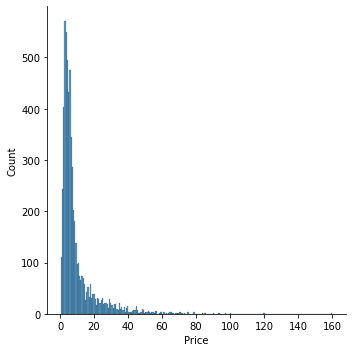

In [339]:
# 타깃 값의 분포가 정규분포인지 확인
sns.displot(df['Price'])

정규 분포가 아닌 형태이기에 로그변환 적용함

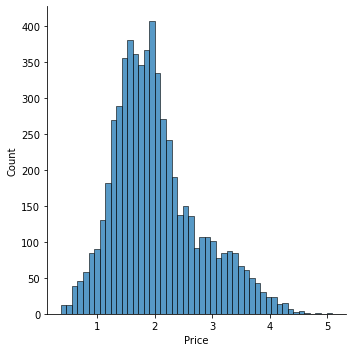

In [340]:
log_price = np.log1p(df['Price'])
sns.displot(log_price)

In [341]:
df['Price'] = log_price;df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.011601,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,2.602690,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,1.704748,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1.945910,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,2.930660,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,1.749200,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,1.609438,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,1.360977,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,1.294727,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [342]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5872.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,...,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.276894,5.278828,2.021149,0.037322,0.059079,0.082008,...,0.009372,0.534728,0.001674,0.454226,0.286025,0.713975,0.820586,0.001339,0.159498,0.018577
std,3.247238,9.155851e+04,4.521801,601.036987,53.881892,0.808959,0.747305,0.189566,0.235793,0.274400,...,0.096364,0.498834,0.040879,0.497942,0.451939,0.451939,0.383731,0.036570,0.366170,0.135038
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.364643,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,75.000000,5.000000,1.504077,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,97.700000,5.000000,1.894617,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,2.393339,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,5.081404,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

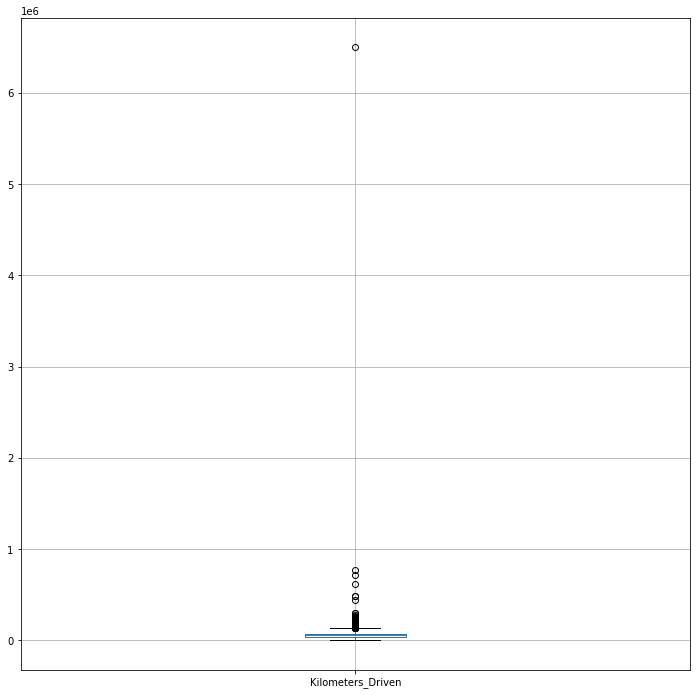

In [343]:
df.boxplot(['Kilometers_Driven'], figsize=(12, 12))

In [344]:
df.sort_values(['Kilometers_Driven'], ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2328,2017,6500000,15.97,2993.0,258.00,5.0,4.189655,0,0,1,...,0,1,0,0,1,0,1,0,0,0
340,2013,775000,19.30,1968.0,141.00,5.0,2.140066,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1860,2013,720000,20.54,1598.0,103.60,5.0,1.931521,0,0,1,...,0,1,0,0,0,1,1,0,0,0
358,2009,620000,20.36,1197.0,78.90,5.0,1.308333,0,0,1,...,0,0,0,1,0,1,1,0,0,0
2823,2015,480000,16.96,1968.0,138.03,5.0,2.639057,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,2019,1000,17.19,1197.0,81.86,5.0,2.261763,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5941,2018,1000,25.17,799.0,53.30,5.0,1.481605,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2646,2019,1000,18.12,1196.0,86.80,5.0,2.054124,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5606,2019,600,21.50,1197.0,81.80,5.0,1.981001,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [345]:
df.drop(index=2328, inplace=True) # 극단적인 이상치 삭제

In [346]:
df.sort_values(['Kilometers_Driven'], ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
340,2013,775000,19.30,1968.0,141.00,5.0,2.140066,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1860,2013,720000,20.54,1598.0,103.60,5.0,1.931521,0,0,1,...,0,1,0,0,0,1,1,0,0,0
358,2009,620000,20.36,1197.0,78.90,5.0,1.308333,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3092,2015,480000,17.40,1497.0,117.30,5.0,1.791759,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2823,2015,480000,16.96,1968.0,138.03,5.0,2.639057,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2019,1000,18.12,1196.0,86.80,5.0,2.054124,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1242,2018,1000,13.60,1999.0,177.00,5.0,3.713572,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1598,2017,1000,13.49,2179.0,138.03,5.0,2.140066,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5606,2019,600,21.50,1197.0,81.80,5.0,1.981001,0,0,0,...,0,0,0,1,1,0,1,0,0,0


<AxesSubplot:>

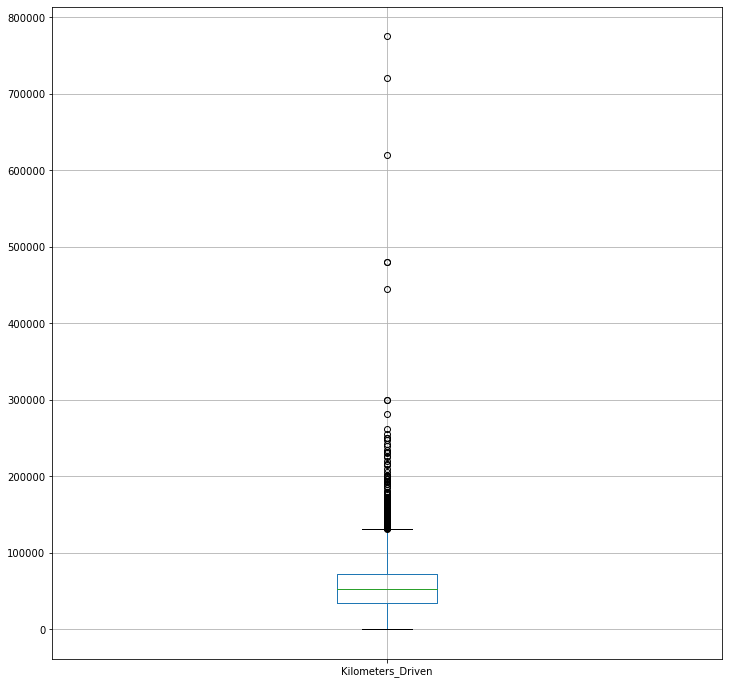

In [347]:
df.boxplot(['Kilometers_Driven'], figsize=(12, 12))

In [348]:
df = df[(df['Kilometers_Driven'] <= 400000)]
df # boxplot상 이상치들 중 극단적으로 동떨어져있는 이상치 추가적으로 더 제거함

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.011601,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,2.602690,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,1.704748,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1.945910,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,2.930660,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,1.749200,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,1.609438,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,1.360977,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,1.294727,0,0,0,...,0,0,0,1,0,1,1,0,0,0


<AxesSubplot:>

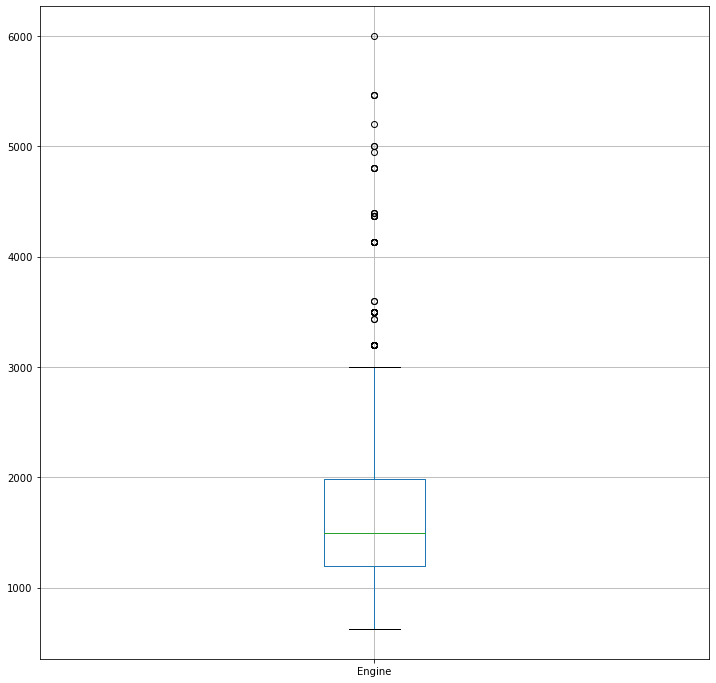

In [349]:
df.boxplot(['Engine'], figsize=(12, 12))

In [350]:
df.sort_values(['Engine'], ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
5521,2006,48000,8.60,5998.0,552.00,4.0,4.094345,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4722,2010,35000,8.10,5461.0,387.30,2.0,3.417727,0,0,0,...,0,0,0,1,1,0,1,0,0,0
152,2010,35277,7.81,5461.0,362.90,5.0,3.433987,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4691,2014,3000,12.00,5461.0,421.00,2.0,4.510860,0,1,0,...,0,0,0,1,1,0,0,0,1,0
5781,2011,6500,6.40,5204.0,560.00,2.0,4.795791,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,2015,25811,25.40,624.0,37.50,4.0,1.141033,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5377,2016,17800,21.90,624.0,37.48,4.0,1.217876,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4561,2014,42083,25.40,624.0,37.48,4.0,0.985817,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4500,2016,29000,21.90,624.0,37.48,4.0,1.335001,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [351]:
df = df[(df['Engine'] <= 5500)] # 5998.0 제거

<AxesSubplot:>

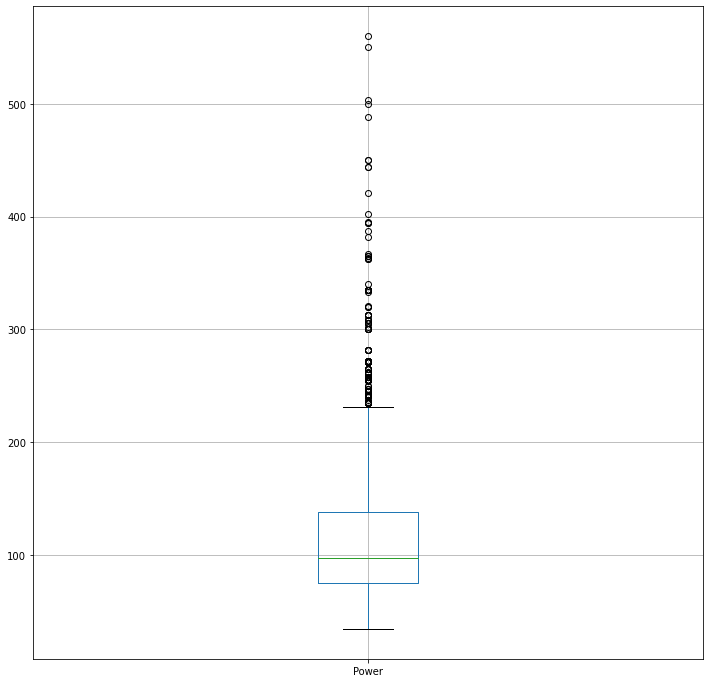

In [352]:
df.boxplot(['Power'], figsize=(12, 12))

In [353]:
df.sort_values(['Power'], ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
5781,2011,6500,6.40,5204.0,560.0,2.0,4.795791,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2100,2010,35000,11.90,4806.0,550.0,5.0,3.496508,0,0,0,...,0,0,0,1,1,0,0,0,1,0
5088,2011,43686,10.50,5000.0,503.0,4.0,3.944684,0,0,0,...,0,0,0,1,1,0,1,0,0,0
70,2008,73000,8.50,4806.0,500.0,5.0,2.740840,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5919,2015,8000,12.50,5000.0,488.1,2.0,4.615121,0,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,2007,79000,17.00,1086.0,NaN,5.0,1.047319,0,0,1,...,0,0,0,1,0,1,1,0,0,0
5873,2006,47200,17.00,1086.0,NaN,5.0,0.788457,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5925,2010,85000,17.50,1798.0,NaN,5.0,1.348073,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5943,2002,75000,0.00,2112.0,NaN,6.0,0.993252,0,0,1,...,0,1,0,0,0,1,1,0,0,0


In [354]:
df.drop(index=[5781, 2100], inplace=True)

In [355]:
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.011601,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,2.602690,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,1.704748,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1.945910,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,2.930660,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,1.749200,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,1.609438,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,1.360977,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,1.294727,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [356]:
num = list(df.select_dtypes(include=['int64', 'float64']).columns);num

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [357]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[num] = imputer.fit_transform(df[num])
# imputer를 이용해 mean으로 결측치 대체함

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5965 non-null   float64
 1   Kilometers_Driven          5965 non-null   float64
 2   Mileage                    5965 non-null   float64
 3   Engine                     5965 non-null   float64
 4   Power                      5965 non-null   float64
 5   Seats                      5965 non-null   float64
 6   Price                      5965 non-null   float64
 7   Location_Ahmedabad         5965 non-null   uint8  
 8   Location_Bangalore         5965 non-null   uint8  
 9   Location_Chennai           5965 non-null   uint8  
 10  Location_Coimbatore        5965 non-null   uint8  
 11  Location_Delhi             5965 non-null   uint8  
 12  Location_Hyderabad         5965 non-null   uint8  
 13  Location_Jaipur            5965 non-null   uint8

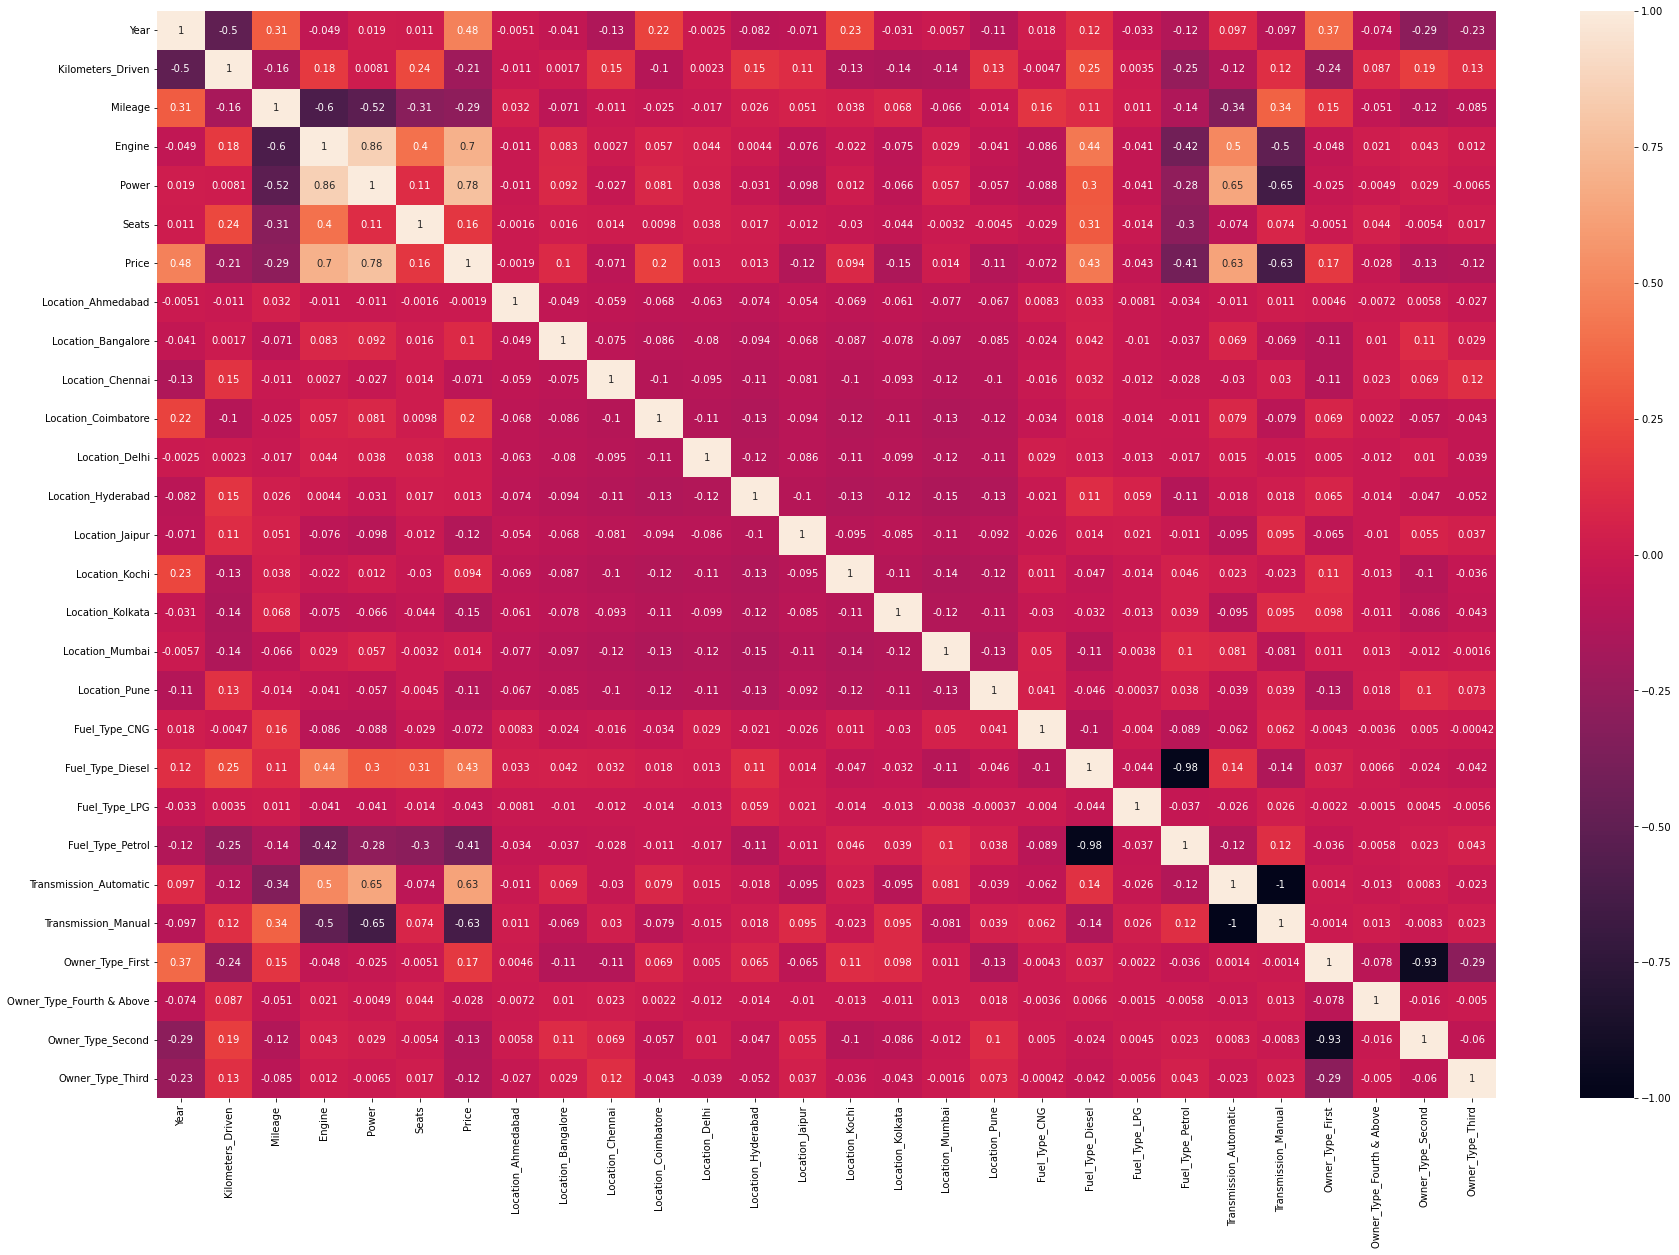

In [362]:
plt.figure(figsize = (30,20)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

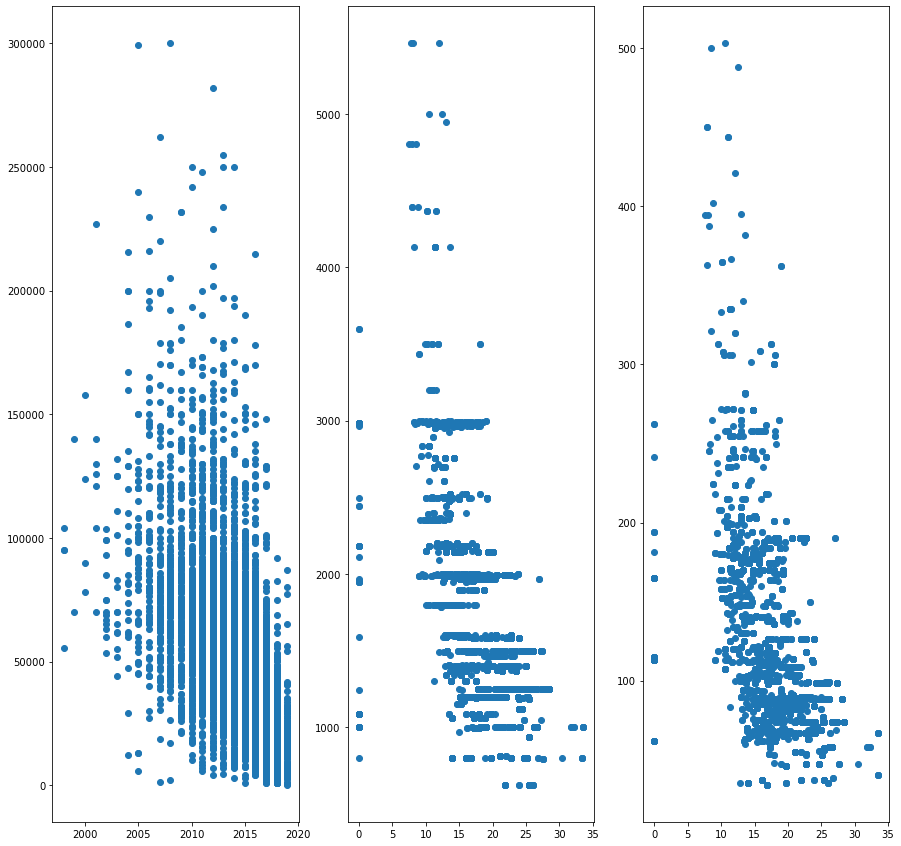

In [371]:
# 상관관계가 큰 독립변수간 scatterplot 대략적으로 그려봄
fig, axes=plt.subplots(1, 3, figsize = (15, 15))
axes[0].scatter(df['Year'], df['Kilometers_Driven'])
axes[1].scatter(df['Mileage'], df['Engine'])
axes[2].scatter(df['Mileage'], df['Power'])

In [ ]:
# 선형성

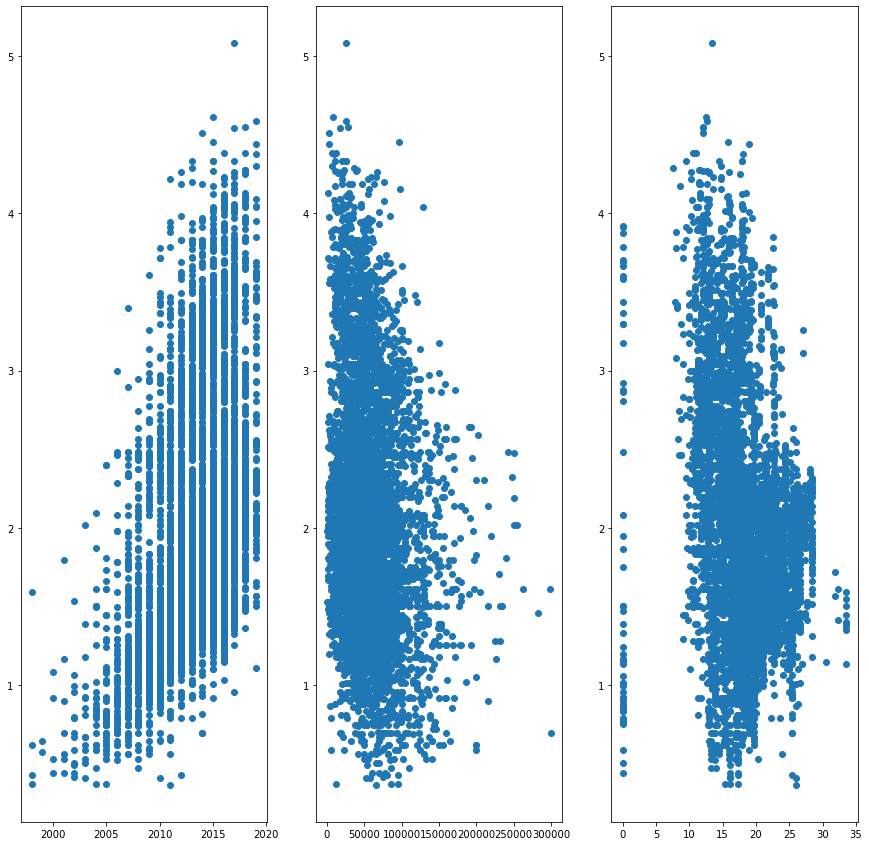

In [386]:
fig, axes=plt.subplots(1, 3, figsize = (15, 15))
axes[0].scatter(df['Year'], df['Price'])
axes[1].scatter(df['Kilometers_Driven'], df['Price'])
axes[2].scatter(df['Mileage'], df['Price'])
# 종속변수와 독립변수간 scatter plot을 그려본 결과 대부분 선형성을 가진다고 보기 어려움

In [385]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [388]:
from scipy import stats

statistic, p_value = stats.shapiro(df) # Shapiro-Wilk 정규성 검정 수행

print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# 유의수준 0.05로 검정
if p_value > 0.05:
    print("데이터는 정규분포를 따른다.")
else:
    print("데이터는 정규분포를 따르지 않는다.")

Shapiro-Wilk Statistic: 0.1711735725402832
P-value: 0.0
데이터는 정규분포를 따르지 않는다.


 Shapiro-Wilk 통계량은 0.1711735725402832로 나타남. 값이 작기 때문에 데이터가 정규분포를 따르지 않는 것을 의미. 즉, 해당 데이터 샘플은 정규분포를 따르지 않을 가능성이 높다는 것을 나타냄.

In [358]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [359]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((4772, 27), (1193, 27), (1193,), (4772,))

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training Score: ', lr.score(X_train, y_train))
print('Testing Score: ', lr.score(X_test, y_test))

Training Score:  0.8870870015766533
Testing Score:  0.869121881673409


In [390]:
y_pred = lr.predict(X)
residuals = y-y_pred

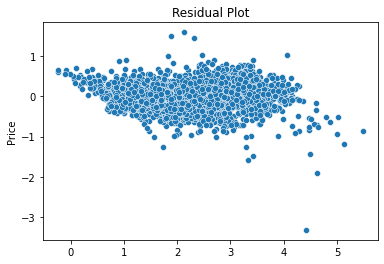

In [393]:
# 잔차의 residual plot
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.show()
# 완전한 등분산성을 띤다고 보기엔 어려우나 몇몇의 데이터를 제외하고는 등분산성을 보임

In [396]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)  # alpha: 규제 강도를 조절하는 하이퍼파라미터
ridge.fit(X_train_scaled, y_train)

print('Training Score: ', ridge.score(X_train_scaled, y_train))
print('Testing Score: ', ridge.score(X_test_scaled, y_test))

Training Score:  0.8870869622502556
Testing Score:  0.8691277781674368


릿지 회귀모델을 적용한 결과 선형회귀모델과 큰 차이가 나지 않음이 관찰됨.

In [397]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=1.0) 
lasso.fit(X_train_scaled, y_train)

print('Training Score: ', lasso.score(X_train_scaled, y_train))
print('Testing Score: ', lasso.score(X_test_scaled, y_test))

Training Score:  0.0
Testing Score:  -6.178724629113397e-05


라쏘 회귀에서 점수가 음수가 나오는 경우는 모델이 데이터에 매우 적합하지 않거나 오버피팅 되었을 가능성이 있다는 것을 의미함. 따라서 위 데이터에서는 라쏘 모델은 적합하지 않다고 판단됨.